**Modern Portfolio Theory (MPT)**

In [10]:
# !pip install empyrial

In [11]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [12]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['AAPL', 'ABNB', 'ABT', 'AMZN', 'CBOE', 'CCL', 'CSCO', 'ECL', 'GE', 'GOOGL', 'KO', 'META', 'MMC', 'MRK', 'VRTX', 'WDC', 'WFC', 'TRGP']

In [13]:
len(list_tickers)

18

In [14]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_start = pd.to_datetime(date_today) - pd.DateOffset(months=36)
date_start = date_start.strftime("%Y-%m-%d")
date_start

'2021-02-13'

In [15]:
portfolio = Engine(
    start_date = date_start,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-02-13
End date: 2024-02-13


,Backtest
,
Annual return,16.47%
Cumulative return,57.63%
Annual volatility,17.39 %
Winning day ratio,53.59%
Sharpe ratio,0.96
Calmar ratio,0.78
Information ratio,0.0
Stability,0.52
Max Drawdown,-20.98 %


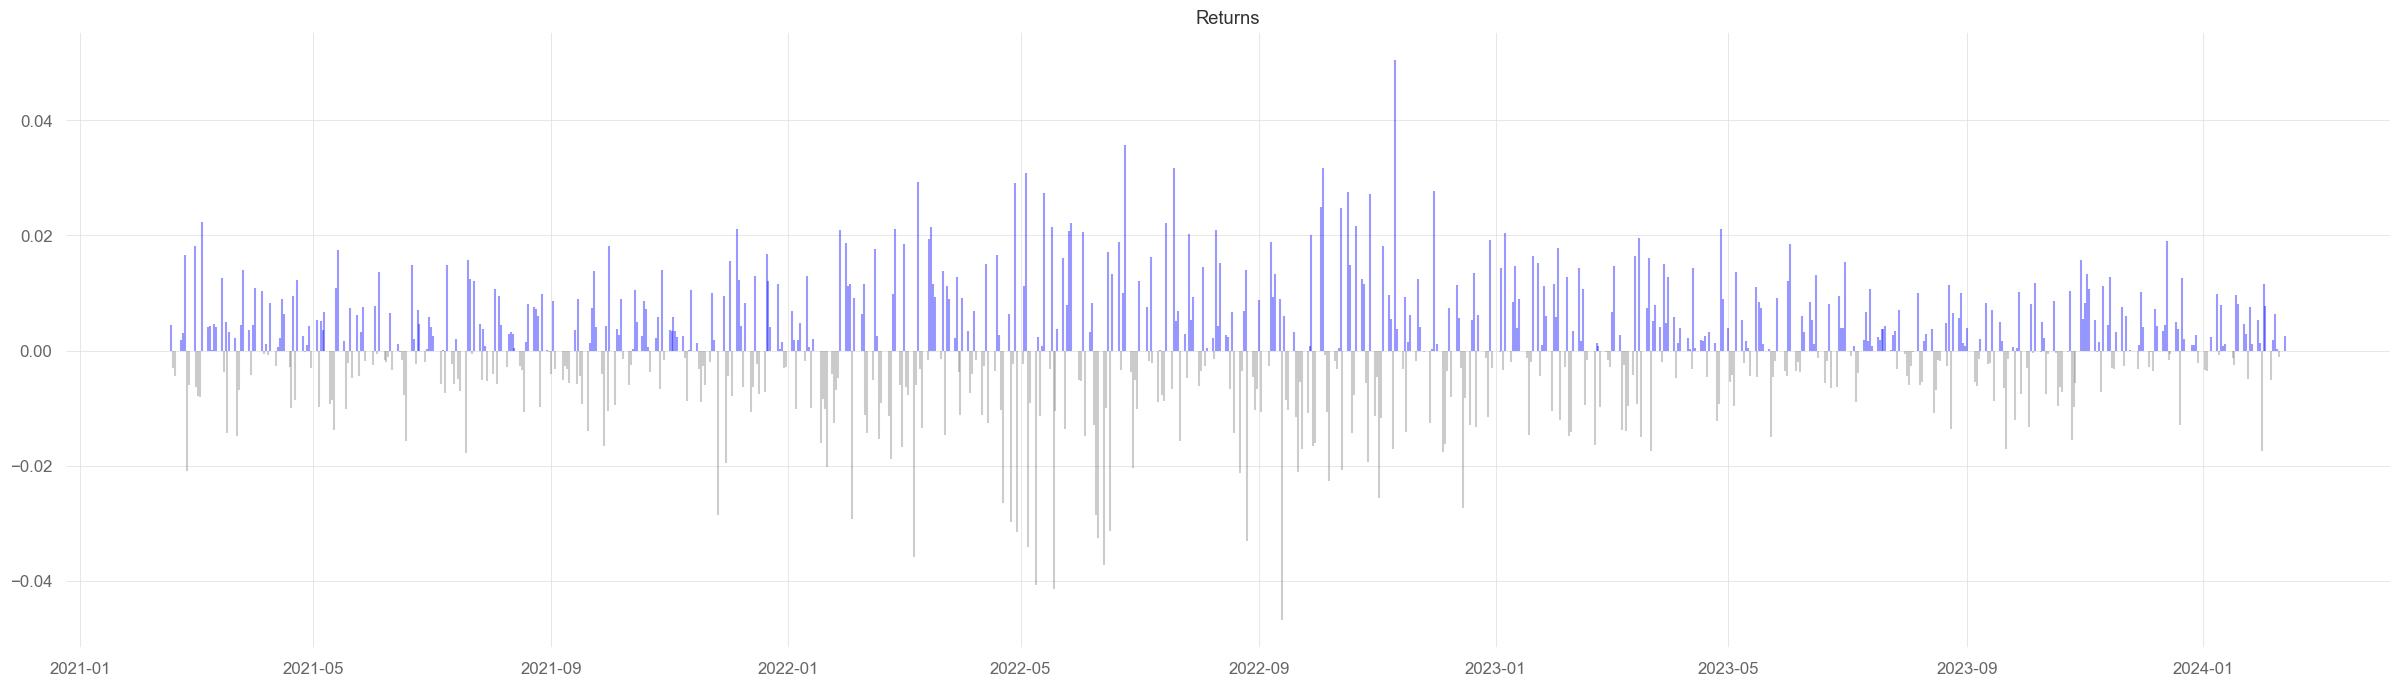

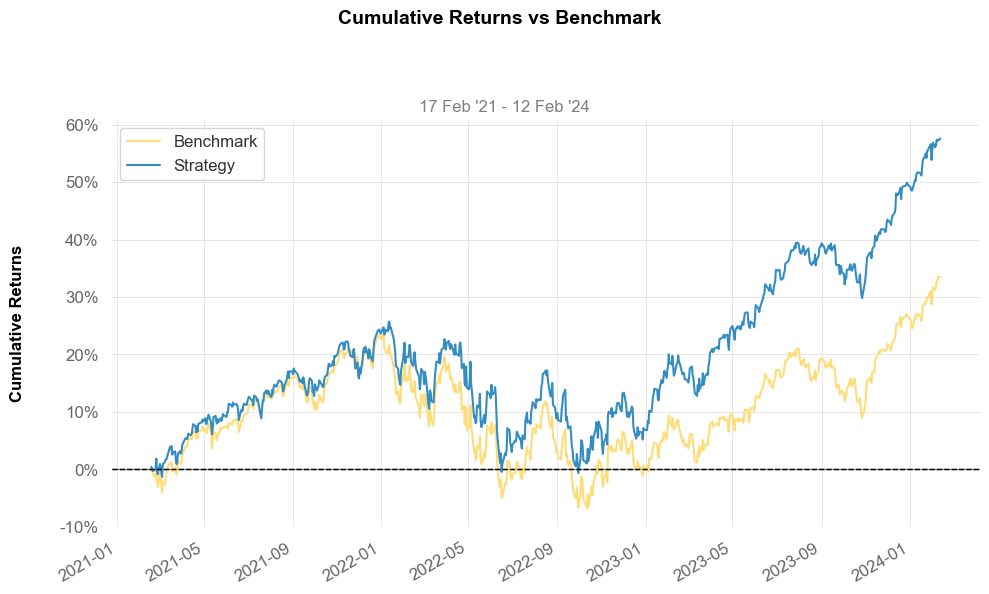

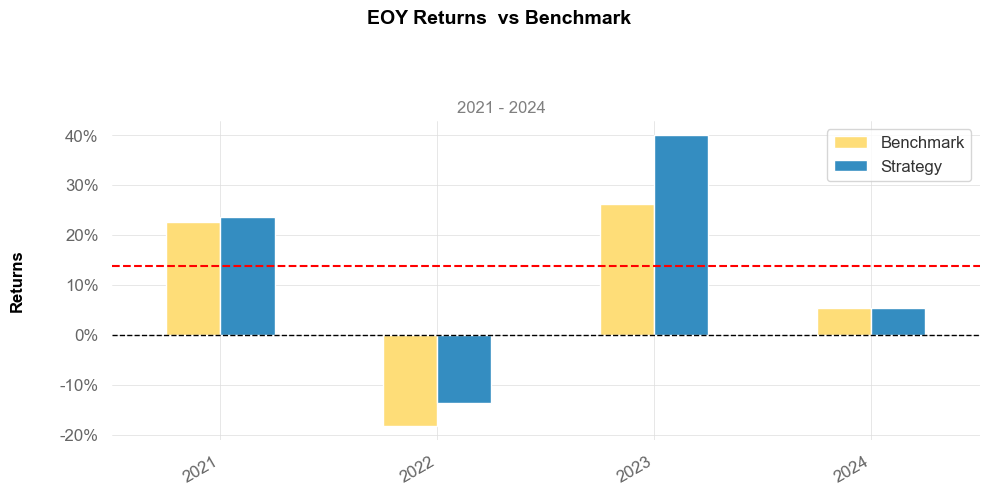

In [16]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [17]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-03-15,2021-04-14,2021-05-15,2021-06-14,2021-07-15,2021-08-14,2021-09-13,2021-10-14,2021-11-13,2021-12-14,...,2023-06-14,2023-07-15,2023-08-14,2023-09-13,2023-10-14,2023-11-13,2023-12-14,2024-01-13,2024-02-13,2024-02-13
AAPL,0.05016,0.05197,0.05092,0.05213,0.05392,0.05437,0.05458,0.05441,0.05419,0.05580,...,0.05238,0.05256,0.05274,0.05260,0.05286,0.05304,0.05319,0.05328,0.05338,0.05338
ABNB,0.04597,0.04559,0.04907,0.04836,0.04972,0.05053,0.05016,0.04930,0.04841,0.04543,...,0.03435,0.03457,0.03479,0.03526,0.03540,0.03565,0.03570,0.03599,0.03616,0.03616
ABT,0.05719,0.05935,0.05944,0.05964,0.06059,0.06236,0.06317,0.06332,0.06328,0.06493,...,0.06643,0.06629,0.06589,0.06577,0.06564,0.06591,0.06585,0.06566,0.06561,0.06561
AMZN,0.05713,0.05707,0.05653,0.05685,0.06010,0.05945,0.05951,0.05887,0.05811,0.05887,...,0.04426,0.04444,0.04465,0.04476,0.04474,0.04473,0.04494,0.04510,0.04515,0.04515
CBOE,0.05704,0.06025,0.06424,0.06362,0.06101,0.06179,0.06221,0.06281,0.06233,0.06251,...,0.07370,0.07323,0.07287,0.07268,0.07258,0.07249,0.07235,0.07193,0.07191,0.07191
CCL,0.06015,0.04930,0.04378,0.04648,0.04591,0.04095,0.04074,0.04166,0.04323,0.03835,...,0.02119,0.02139,0.02201,0.02252,0.02286,0.02311,0.02368,0.02399,0.02473,0.02473
CSCO,0.05745,0.05697,0.05681,0.05684,0.05667,0.05781,0.05780,0.05772,0.05817,0.05882,...,0.06440,0.06415,0.06408,0.06394,0.06381,0.06378,0.06351,0.06348,0.06324,0.06324
ECL,0.05776,0.06051,0.05923,0.05879,0.05830,0.05892,0.05919,0.05845,0.05801,0.05819,...,0.05644,0.05664,0.05670,0.05683,0.05685,0.05680,0.05675,0.05680,0.05681,0.05682
GE,0.05362,0.05211,0.05287,0.05370,0.05240,0.05052,0.05021,0.05012,0.05035,0.04949,...,0.05543,0.05555,0.05554,0.05543,0.05530,0.05505,0.05525,0.05514,0.05519,0.05519
GOOGL,0.05432,0.05521,0.05363,0.05411,0.05529,0.05529,0.05540,0.05464,0.05527,0.05560,...,0.04993,0.04995,0.04998,0.05006,0.05008,0.04972,0.05009,0.05028,0.05013,0.05013


In [18]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-02-13
AAPL,0.05338
ABNB,0.03616
ABT,0.06561
AMZN,0.04515
CBOE,0.07191
CCL,0.02473
CSCO,0.06324
ECL,0.05682
GE,0.05519
GOOGL,0.05013
